![alt text](https://zewailcity.edu.eg/main/images/logo3.png)

**Project #1 for CIE458**
_Prepared by_  [**Samaa Khair**](mailto:s-samaa.khair@zewailcity.edu.eg)
and [**Muhammad Khalid**](mailto:s-muhammad.khalid@zewailcity.edu.eg)





#**Problem Formulation**

Problem formulation is the first step in solving it.

In [182]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pylab as plt
import pandas as pd
import math

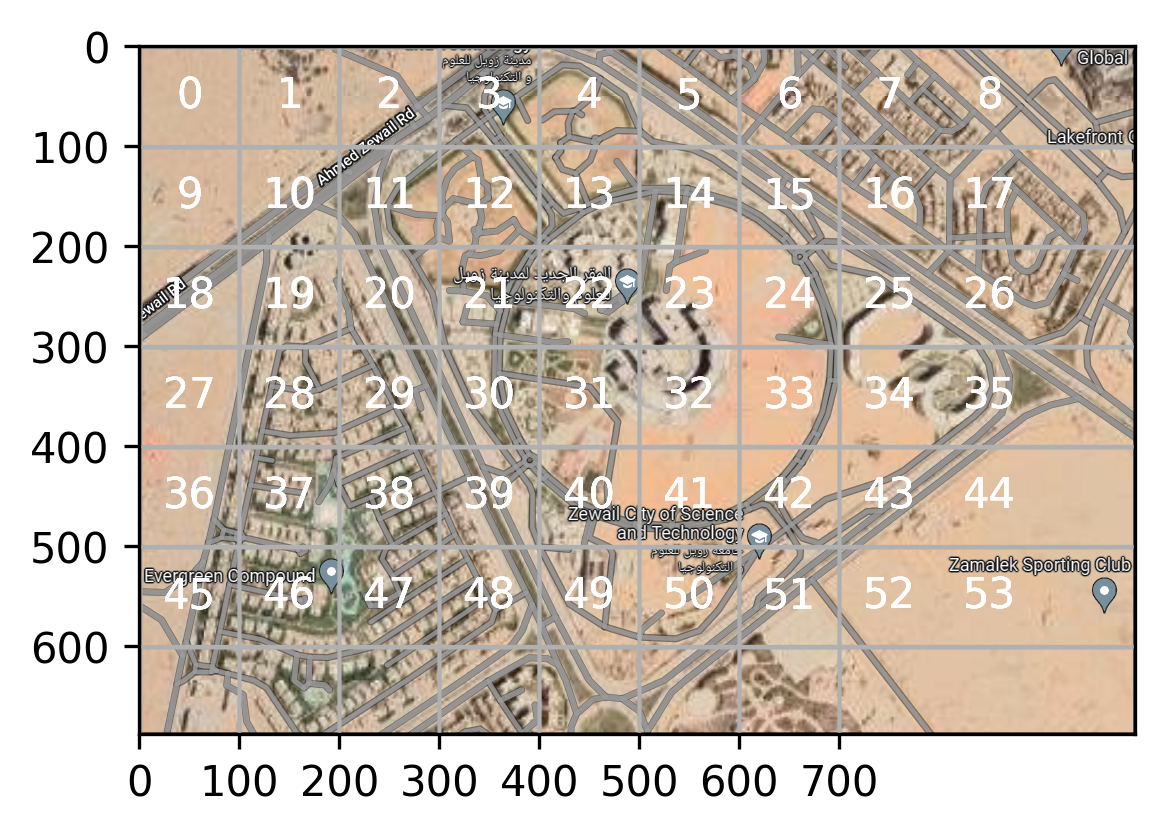

In [183]:
try:
    from PIL import Image
except ImportError:
    import Image

# Open image file
image = Image.open('University.png')
my_dpi=300.

# Set up figure
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Set the gridding interval: here we use the major tick interval
myInterval=100.
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')
# Add the image
ax.imshow(image)

# Find number of gridsquares in x and y direction
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# Add some labels to the gridsquares
for j in range(ny):
    y=myInterval/2+j*myInterval
    for i in range(nx):
        x=myInterval/2.+float(i)*myInterval
        ax.text(x,y,'{:d}'.format(i+j*nx),color='w',ha='center',va='center')

# Save the figure
fig.savefig('University.png',dpi=my_dpi)

In [ ]:
class Problem:
    '''
    Abstract base class for problem formulation that supports a heuristic function.
    It declares the expected methods to be used by a search algorithm.
    All the methods declared are just placeholders that throw errors if not overriden by child "concrete" classes!
    '''
    
    def __init__(self):
        '''Constructor that initializes the problem. Typically used to setup the initial state and, if applicable, the goal state.'''
        self.init_state = None
    
    def actions(self, state):
        '''Returns an iterable with the applicable actions to the given state.'''
        raise NotImplementedError
    
    def result(self, state, action):
        '''Returns the resulting state from applying the given action to the given state.'''
        raise NotImplementedError
    
    def goal_test(self, state):
        '''Returns whether or not the given state is a goal state.'''
        raise NotImplementedError
    
    def step_cost(self, state, action):
        '''Returns the step cost of applying the given action to the given state.'''
        raise NotImplementedError

    def heuristic(self, state):
        '''Returns the heuristic value of the given state, i.e., the estimated number of steps to the nearest goal state.'''
        raise NotImplementedError
    
    @classmethod
    def new_random_instance(cls):
        '''Factory method to a problem instance with a random initial state.'''
        raise NotImplementedError


## Visualization

In [ ]:
from shutil import get_terminal_size
terminal_width, _ = get_terminal_size()

_visualizers = {}

def _default_visualizer(_, state):
    '''Generic visualizer for unknown problems.'''
    print(state)

class Visualizer:
    '''Visualization and printing functionality encapsulation.'''

    def __init__(self, problem):
        '''Constructor with the problem to visualize.'''
        self.problem = problem
        self.counter = 0
    
    def visualize(self, frontier):
        '''Visualizes the frontier at every step.'''
        self.counter += 1
        print(f'Frontier at step {self.counter}')
        for state in frontier:
            print()
            _visualizers.get(type(self.problem), _default_visualizer)(self.problem, state)
        print('-' * terminal_width)

## Node Data Structure

A class for some required bookkeeping.

In [233]:
class Node: #FOR INFORMED
    '''Node data structure for search space bookkeeping.'''
    
    def _init_(self, state, parent, action, path_cost, heuristic):
        '''Constructor for the node state with the required parameters.'''
        self.state = state
        self.parent = parent
        self.action = action
        self.g = path_cost
        self.h = heuristic
        self.f = path_cost + heuristic

    @classmethod
    def root(cls, problem):
        '''Factory method to create the root node.'''
        init_state = problem.init_state
        return cls(init_state, None, None, 0, problem.heuristic(init_state))


    @classmethod
    def child(cls, problem, parent, action,ht):
        '''Factory method to create a child node.'''
        child_state = problem.result(parent.state, action)
        if ht==0:
          return cls(
              child_state,
              parent,
              action,
              parent.g + problem.step_cost(parent.state, action),
              problem.heuristic(child_state))
        else:
          return cls(
              child_state,
              parent,
              action,
              parent.g + problem.step_cost(parent.state, action),
              problem.heuristic1(child_state))

def solution_in(node):
    '''A method to extract the sequence of actions representing the solution from the goal node.'''
    actions = []
    cost = node.g
    while node.parent is not None:
        actions.append(node.action)
        node = node.parent
    actions.reverse()
    return actions, cost

In [211]:
class Node: #For UNINFORMED
    '''Node data structure for search space bookkeeping.'''
    
    def __init__(self, state, parent, action, path_cost):
        '''Constructor for the node state with the required parameters.'''
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    @classmethod
    def root(cls, init_state):
        '''Factory method to create the root node.'''
        return cls(init_state, None, None, 0)

    @classmethod
    def child(cls, problem, parent, action):
        '''Factory method to create a child node.'''
        return cls(
            problem.result(parent.state, action),
            parent,
            action,
            parent.path_cost + problem.step_cost(parent.state, action))

def solution(node):
    '''A method to extract the sequence of actions representing the solution from the goal node.'''
    actions = []
    cost = node.path_cost
    while node.parent is not None:
        actions.append(node.action)
        node = node.parent
    actions.reverse()
    return actions, cost

In [227]:
class Node: #FOR IDS
    '''Node data structure for search space bookkeeping.'''
    
    def __init__(self, state, parent, action, path_cost, depth = 0):
        '''Constructor for the node state with the required parameters.'''
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    @classmethod
    def root(cls, init_state, depth = 0):
        '''Factory method to create the root node.'''
        return cls(init_state, None, None, 0, depth)

    @classmethod
    def child(cls, problem, parent, action):
        '''Factory method to create a child node.'''
        return cls(
            problem.result(parent.state, action),
            parent,
            action,
            parent.path_cost + problem.step_cost(parent.state, action))
        
    def setDepth(self):
      if self.parent:
        self.depth = self.parent.depth + 1
      else:
        self.depth = 0

def solution(node):
    '''A method to extract the sequence of actions representing the solution from the goal node.'''
    actions = []
    cost = node.path_cost
    while node.parent is not None:
        actions.append(node.action)
        node = node.parent
    actions.reverse()
    return actions, cost

#**Search Algorithms implementations**

##Uninformed Algorithms:


*   BFS
*   DFS
*   IDS






### Breadth-First Search (BFS)

Breadth-first search is an uninformed algorithm that searches the state space level-by-level starting from the initial node, i.e., it starts by looking at the root node, then its children, its children's children after that, and so on! Here are example implementations for both its tree version and its graph version.

In [ ]:
from collections import deque
##TODO: Decide if we're gonna use graph or tree and remove the other option
def bfs_tree(problem, verbose=False):
    '''Breadth-first tree search implementation.'''
    if problem.goal_test(problem.init_state): return solution(Node.root(problem.init_state))
    frontier = deque([Node.root(problem.init_state)]) #queue
    if verbose: visualizer = Visualizer(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        node = frontier.pop()
        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if problem.goal_test(child.state):
                return solution(child)
            frontier.appendleft(child)

def bfs_graph(problem, verbose=False):
    '''Breadth-first graph search implementation.'''
    if problem.goal_test(problem.init_state): return solution(Node.root(problem.init_state))
    frontier = deque([Node.root(problem.init_state)])
    explored = {problem.init_state}
    if verbose: visualizer = Visualizer(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        node = frontier.pop()
        print(str(node.state))
        for action in problem.actions(node.state):
            child = Node.child(problem, node, str(action))
            if child.state not in explored:
                if problem.goal_test(child.state):
                    return solution(child)
                frontier.appendleft(child)
                explored.add(child.state)

### Depth-First Search (DFS)
The algorithm is similar to BFS but instead of using queue we use stack.

In [ ]:
def dfs_tree(problem, verbose=False):
    '''Depth-first tree search implementation.'''
    if problem.goal_test(problem.init_state): return solution(problem.init_state)
    frontier = deque([Node.root(problem.init_state)])
    if verbose: visualizer = Visualizer(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        node = frontier.pop()
        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if problem.goal_test(child.state):
                return solution(child)
            frontier.append(child)

def dfs_graph(problem, verbose=False):
    '''Depth-first graph search implementation.'''
    if problem.goal_test(problem.init_state): return solution(problem.init_state)
    frontier = deque([Node.root(problem.init_state)])
    explored = {problem.init_state}
    if verbose: visualizer = Visualizer(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        node = frontier.pop()
        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if child.state not in explored:
                if problem.goal_test(child.state):
                    return solution(child)
                frontier.append(child)
                explored.add(child.state)

### Depth Limited Search (DLS)
will help in the implementation of other algorithms

In [ ]:
def dls_tree(problem, limit, verbose=False):
  '''Depth-limited tree search implementation.'''
  frontier = deque([Node.root(problem.init_state)])
  if verbose: visualizer = Visualizer(problem)
  while frontier:
    if verbose: visualizer.visualize(frontier)
    node = frontier.pop()
    node.setDepth()
    if problem.goal_test(node.state): return solution(node)
    if (limit < 0) or (limit >= 0 and node.depth != limit):
      for action in problem.actions(node.state):
        child = Node.child(problem, node, action)
        frontier.append(child)
        
def dls_graph(problem, limit, verbose=False): #this function will act as dfs if limit is less than 0
  '''Depth-limited graph search implementation.'''
  frontier = deque([Node.root(problem.init_state)])
  explored = {problem.init_state}
  if verbose: visualizer = Visualizer(problem)
  while frontier:
    if verbose: visualizer.visualize(frontier)
    node = frontier.pop()
    node.setDepth()
    if problem.goal_test(node.state): return solution(node)
    if (limit < 0) or (limit >= 0 and node.depth != limit):
      for action in problem.actions(node.state):
        child = Node.child(problem, node, action)
        if child.state not in explored:
          explored.add(child.state)
          frontier.append(child)

### Iterative Deepening Search (IDS)
Finds the best depth limit by gradually increasing it until a goal is found.


In [ ]:
def ids_tree(problem, maxdepth, verbose=False):
  '''Depth-first graph search implementation.'''
  if maxdepth >= 0:
    for limit in range(0, maxdepth + 1):
      print("Call to dls No. {}".format(limit + 1))
      sol = dls_tree(problem, limit, verbose)
      if sol:
        return sol
  else: print("ERROR: maxdepth must be >= 0")

def ids_graph(problem, maxdepth, verbose=False):
  '''Depth-first graph search implementation.'''
  if maxdepth >= 0:
    for limit in range(0, maxdepth + 1):
      print("Call to dls No. {}".format(limit + 1))
      sol = dls_graph(problem, limit, verbose)
      if sol:
        return sol
  else: print("ERROR: maxdepth must be >= 0")

##Informed Algorithms:


*  Greedy best-first
*  A*


###Greedy Best-First Search

Greedy best-first search is an informed algorithm that uses the heuristic value to choose the next node to expand. It is... well, *greedy* so it is *not optimal*! It follows the most *promising* node and that's it!

In [ ]:
from heapq import heappush, heappop
from itertools import count

counter = count()

def greedy_best_first(problem, verbose=False):
    '''Greedy best-first search implementation.'''
    frontier = [(None, None, Node.root(problem))]
    explored = set()
    if verbose: visualizer = Visualizer(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        _, _, node = heappop(frontier)
        if node.state in explored: continue
        if problem.goal_test(node.state):
            return solution(node)
        explored.add(node.state)
        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if child.state not in explored:
                heappush(frontier, (child.h, next(counter), child))

###A* Search


In [ ]:
from heapq import heappush, heappop
from itertools import count

counter = count()

def A_star(problem, verbose=False):
    '''A* search implementation.'''
    frontier = [(None, None, Node.root(problem))]
    explored = set()
    if verbose: visualizer = Visualizer(problem)
    while frontier:
        if verbose: visualizer.visualize(frontier)
        _, _, node = heappop(frontier)
        if node.state in explored: continue
        if problem.goal_test(node.state):
            return solution(node)
        explored.add(node.state)
        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if child.state not in explored:
                heappush(frontier, (child.f, next(counter), child))

##Local Search Algorithms:


*  Hill-Climbing
*  Simulated Annealing


### Hill Climbing

Let's start with keeping just one state in memory! That's right we may solve problems with *O(1)* memory! The obvious question, however, is where to go from it! A logical, but greedy, approach would be to consider the best next possible state (highest-valued child). This mirrors climbing straight up a hill instead of considering all other possible directions (and, obviously, that is how it got its name!). It is also known as *greedy local search*, nothing surprising here! As most *greedy* algorithms, this is *not complete*! This approach can easily get stuck in local maxima (the top of *a* hill instead of the highest possible hill).

In [ ]:
def hill_climbing(problem, verbose=False):
    '''Hill climbing search implementation.'''
    current_state = problem.init_state
    current_value = problem.heuristic(current_state)
    if verbose: visualizer = Visualizer(problem)
    while True:
        if verbose: visualizer.visualize([current_state])
        next_state, next_value = None, None
        for action in problem.actions(current_state):
            new_state = problem.result(current_state, action)
            new_value = problem.heuristic(new_state)
            if next_value is None or next_value > new_value:
                next_state, next_value = new_state, new_value
        if current_value <= next_value: return current_state
        current_state, current_value = next_state, next_value
        
def random_restart_hill_climbing(problem_gen, verbose=False):
    '''Random-restart hill climbing search implementation.'''
    while True:  # Keep repeating till the problem is solved
        problem = problem_gen()  # Generate a new problem instance (only works if each problem instance is different from the previous, e.g., random initial state)
        solution_state = hill_climbing(problem, verbose)  # Try to solve the problem instance with hill climbing
        if problem.goal_test(solution_state):  return solution_state  # If succeeded, return the solution

### Simulated Annealing

Another approach to mitigate getting stuck is to drop the *best next* requirement. There are a complete family of such algorithms called *stochastic hill climbing* algorithms discussing random strategies to choose the next state. One interesting variation, called *simulated annealing*, even allows downward actions! It is analogous to the *annealing* process in *metallurgy*, from which it gets its name. The idea is to *shake things up* a bit in the start, i.e., be more permissive of bad moves, to better explore the landscape. Then, it cools off as time goes on, i.e., bad moves get less and less tolerated.

In [ ]:
from random import choice, random
from math import exp
from itertools import count

def simulated_annealing(problem, schedule, verbose=False):
    '''Simulated annealing search implementation.'''
    current_state = problem.init_state
    current_value = problem.heuristic(current_state)
    if verbose: visualizer = Visualizer(problem)
    for t in count():
        if verbose: visualizer.visualize([current_state])
        T = schedule(t)  # A function that determines the "temperature" (acceptability of a bad state) as a function of the step count
        if current_value is 0 or T is 0: return current_state  # Return if a goal state is found or if the temperature hits 0
        next_states = [problem.result(current_state, action) for action in problem.actions(current_state)]  # Generate all possible next states
        while True:  # Repeat the following till the current state is updated
            next_state = choice(next_states)  # Choose a random next state
            next_value = problem.heuristic(next_state)
            delta = current_value - next_value
            if delta > 0 or random() < exp(delta / T):  # Accept the randomly chosen state immediately if it is better than the current state or with a probability (exponentially) proportional to the temperature and how bad it is
                current_state, current_value = next_state, next_value
                break

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-22-7baeb2a65e71>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if current_value is 0 or T is 0: return current_state  # Return if a goal state is found or if the temperature hits 0
<ipython-input-22-7baeb2a65e71>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if current_value is 0 or T is 0: return current_state  # Return if a goal state is found or if the temperature hits 0


#**Exploring Optimal path on ZC Campus Problem**

In [203]:
class ZCCampus(Problem):
  '''
  Problem is defined as follow. For all actions, we have the first dic which is ActionMovements.
  ActionMovements contains all possible actions from a given state , we have 44 states defined as the cross roads.
  the second dic is ResultMovements which contains every result for every taken action. The result is a new state.
  The third dic is the cost dic. It contains the cost for a chosen action given a certain state.
  For actions function. It returns all possible actions given a state (key for dic)
  For results function. It returns a result (state) given a state and action.
  For cost function. it returns the cost given a state and action.
  Heuristic function uses the excel sheet derived from the grid picture to calculate SLD and Manhattan distance
  '''
  def __init__(self, init_state,goal):
        self.init_state = init_state
        self.ActionMovements = {1:['NE','SE','SW'] 												
						, 2:['SE','NE','SW']
						, 3:['S','SW']
						, 4:['SW','N','S']
						, 5:['SW' , 'W' ,'NE']
						, 6:['NE','SE','S']
						, 7:['NE' , 'SW']
						, 8:['SE', 'N' , 'NE']
						, 9:['NW' , 'NE' , 'SE' ]
						, 10:['SW','NE','SE']
						, 11:['N','SE','SW']
						, 12:['SE','S','NE']
						, 13:['NW']
						, 14:['NW']
						, 15:['SE','SW']
						, 16:['NW','SW']
						, 17:['NE','NW','E','SW']		
						, 18:['SE','NE'] 
						, 19:['NW','SE']				
						, 20:['NW','NE']
						, 21:['N','NE','SW']
						, 22:['NW','SW']
						, 23:['SE','NW','SW','S']		
						, 24:['W','SE','S']
						, 25:['NW','W','E','SW']
						, 26:['E','NE','SW']
						, 27:['NE']  
						, 28:['N']
						, 29:['NE','NW','SW','SE']
						, 30:['NE','NW','SE']
						, 31:['NE','NW']
						, 32:['SE','SW']
						, 33:['SW','NE','S']
						, 34:['SW','SE','NW','NE']
						, 35:['NE','SE','S']
						, 36:['NE','NW','N','SE','SW']
						, 37:['SW','NW','NE']
						, 38:['SE','SW','NW']
						, 39:['NE','N','E','W']
						, 40:['N','S','E']
						, 41:['N','NE']
						, 42:['W','SW']
						, 43:['SW','SE','NE']
						, 44:['S','W','NE'] } 
        self.ResultsMovements =  {1:{ 'SW':2 , 'SE':29 , 'NE':43 }
									, 2: { 'SE':3 , 'NE': 1 , 'SW':6  }
									, 3:{ 'S':4  ,'SW':5  }
									, 4:{ 'SW':5 ,'N':3 , 'S':40  }
									, 5:{ 'SW':7 , 'W':6 , 'NE':4 }
									, 6:{ 'NE':2 , 'SE': 5 , 'S':8 }
									, 7:{ 'NE':5 ,'SW' :8 }
									, 8: { 'SE':9 , 'N':6 , 'NE':7 }
									, 9:{ 'NW':8 , 'NE':10 , 'SE':19 }
									, 10:{ 'SW':19 , 'NE':11 , 'SE':17 }
									, 11:{ 'N':12,'SE':15,'SW':10 }
									, 12:{ 'SE':13,'S':11,'NE':26 }
									, 13:{ 'NW':12 }
									, 14:{ 'NW':26 }
									, 15:{ 'SE':16,'SW':11 }
									, 16:{ 'NW':15 , 'SW':17 }
									, 17: { 'NE':16 , 'NW':10 , 'E':44 , 'SW':18 }
									, 18:{ 'NE':17 , 'SE':20  }
									, 19:{ 'NW':9 ,'SE':20 }
									, 20:{ 'NW':19 , 'NE':21 }
									, 21:{ 'N':44 , 'NE':22 , 'SW':20 }
									, 22:{ 'SW':21 , 'NW':23 }
									, 23:{ 'SE':22 , 'NW':24 , 'SW':37 , 'S':44 }
									, 24:{ 'SE':23 , 'W':25 , 'S':28 }
									, 25:{ 'E':24 , 'W':39 , 'NW':36 , 'SW':27 }
									, 26:{ 'E':19,'NE':30,'SW':12 }
									, 27:{ 'NE':25 }
									, 28:{ 'N':24 }
									, 29:{ 'NE':39,'NW':43,'SW':30,'SE':31 }
									, 30:{ 'NE':29,'NW':42,'SE':31 }
									, 31:{ 'NE':29,'NW':30 }
									, 32:{ 'SW':33,'SE':38 }
									, 33:{ 'NE':32 , 'SW':43,'S':34 }
									, 34:{ 'SW':35,'SE':36,'NE':38,'NW':33  }
									, 35:{ 'NE':34 , 'SE':36 , 'S':39 }
									, 36:{ 'NE':37 , 'NW':35 , 'N':34 , 'SE':25 , 'SW':39 }
									, 37:{ 'SW':36 , 'NW':38 , 'NE':23 }
									, 38:{ 'SE':37 , 'NW':32 , 'SW':34 }
									, 39:{ 'NE':36,'N':35,'E':25,'W':29 }
									, 40:{ 'N':4 , 'S':41 , 'E':42 }
									, 41:{ 'N':40,'NE':42 }
									, 42:{ 'W':40,'SW':41 }
									, 43:{ 'SW':1,'SE':29 , 'NE':33 }
									, 44:{ 'S':21 , 'W':17 , 'NE':24 } }
									
        self.cost = {1:{'NE':1 , 'SW':10 , 'SE':1}
					,2:{'SE':1 , 'NE':1 ,'SW':10}
					,3:{'S':5 ,'SW':6}
					,4:{'S':5 ,'SW':6 ,'N':5}
					,5:{'SW':1,'W':5,'NE':4}
					,6:{'NE':5 ,'SE':4,'S':3}
					,7:{ 'NE':1 ,'SW' : 5}
					,8: {'SE':10 ,'N':8, 'NE':5}
					,9:{ 'NW':10,'NE':1,'SE':5}
					,10: {'SW':1, 'NE':5, 'SE':5}
					,11:{ 'N':4,'SE':8,'SW':5}
					,12:{ 'SE':5,'S':4,'NE':4}
					,13:{'NW':5} , 14:{ 'NW':5}
					,15:{ 'SE':5 , 'SW':8}
					,16:{ 'NW':5 , 'SW':5}
					,17: { 'NE':5 , 'NW':5 ,'E':10,'SW':1}
					,18:{ 'NE': 1,'SE':5}
					,19:{ 'NW':5,'SE':5 }
					,20:{'NW':5 , 'NE':21, 'N':15 }
					,21:{ 'N':1 , 'NE':15 , 'SW':15 }
					,22:{ 'SW':15 , 'NW':10}
					,23:{ 'SE':15 ,'NW':10,'SW':15,'S':20}
					,24:{ 'SE':15 , 'W':1 , 'S':10 }
					,25:{ 'E':1 , 'W':5 ,'NW':5 ,'SW':5}
					,26:{ 'E':5,'NE':5,'SW':4 }
					,27:{ 'NE':10 } , 28:{ 'N':10 }
					,29:{ 'NE':1,'NW':10,'SW':1,'SE':5 }
					,30:{ 'NE':1,'NW':2,'SE':1 }
					,31:{ 'NE':1,'NW':1 } 
					,32:{ 'SW':5,'SE':4 }
					,33:{ 'NE':4 , 'SW':1,'S':5 }
					,34:{ 'SW':5,'SE':5,'NE':5,'NW':5 }
					,35:{ 'NE':5 , 'SE':5 , 'S':8 }
					,36:{ 'NE':5 , 'NW':5 , 'N':5 , 'SE':8 , 'SW':8 }
					,37:{ 'SW':5 , 'NW':5 , 'NE':10 }
					,38:{ 'SE':5 , 'NW':4 , 'SW':5 }
					,39:{ 'NE':8,'N':8,'E':5,'W':1 }
					,40:{ 'N':5 , 'S':5 , 'E':6 }
					,41:{ 'N':5,'NE':6 }
					,42:{ 'W':6,'SW':6 }
					,43:{ 'SW':1,'SE':10 , 'NE':4 }
					,44:{ 'S':5 , 'W':10 , 'NE':24 } }
       
        self.goal = goal
  def actions(self, state):
    return self.ActionMovements[state]
  def result(self, state, action):
        return self.ResultsMovements[state][action]

  def goal_test(self, state):
        '''Returns whether or not the given state is a goal state.'''
        return state==self.goal

  def step_cost(self, state, action):
        '''Returns the step cost of applying the given action to the given state.'''
        return self.cost[state][action]
  
  def heuristic(self, state):
    coordinates = pd.DataFrame(pd.read_excel('Coordinates.xlsx'))
    return(math.sqrt((coordinates.iloc[[state+1]]['x']-coordinates.iloc[[self.goal+1]]['x'])**2+(coordinates.iloc[[state+1]]['y']-coordinates.iloc[[self.goal+1]]['y'])**2))

  def ManhattanHeu(self,state):
    coordinates = pd.DataFrame(pd.read_excel('Coordinates.xlsx'))
    return(sum(abs(coordinates.iloc[[state+1]]['x']-coordinates.iloc[[self.goal+1]]['x']),abs(coordinates.iloc[[state+1]]['y']-coordinates.iloc[[self.goal+1]]['y'])))

    

In [230]:
zc = ZCCampus(1,26)
print(dfs_graph(zc))


(['SW', 'SW', 'S', 'SE', 'SE', 'SE', 'NE', 'N', 'W', 'NE', 'NW', 'SW', 'N', 'NE'], 101)


In [229]:
zc1 = ZCCampus(8,32)
print(bfs_graph(zc1))

8
9
6
7
10
19
2
5
11
17
20
3
1
4
12
15
16
44
18
21
43
29
40
13
26
24
22
33
(['N', 'NE', 'NE', 'NE', 'NE', 'NE'], 23)


In [228]:
zc2 = ZCCampus(10,35)
ids_graph(zc2,50)

Call to dls No. 1
Call to dls No. 2
Call to dls No. 3
Call to dls No. 4
Call to dls No. 5
Call to dls No. 6
Call to dls No. 7


(['SE', 'E', 'NE', 'W', 'W', 'N'], 53)

In [235]:
greedy_best_first(zc2)

TypeError: ignored

In [234]:
A_star(zc2)

TypeError: ignored

In [236]:
hill_climbing(zc1)

TypeError: ignored

In [238]:
simulated_annealing(zc1,lambda t: exp(-t))

TypeError: ignored

In [201]:
class ZCBuildings(Problem):
  def __init__(self, init_state,goal):
    self.init_state = init_state
    self.goal = goal
    '''It's assumed that:
    1- Entrance of NB is NANSCI
    2- Entrance of AB is ZoneA
    3- Entrance of HB is BMS
    4- Entrance of AC is FR
    4- Entrance of OB is ADM
    '''
    #1 - ZoneA
    #2 - ZoneB
    #3 - ZoneC
    #4 - ZoneD
    #5 - ZoneE
    #6 - ZoneF
    #7 - CIE
    #8 - NANENG
    #9 - NANSCI
    #10 - BMS
    #11 - ENV
    #12 - EP
    #13 - FR
    #14 - ADM
    #15 - REG
    if(len(goal) == 7):
      if(goal[2:7] == 'ZoneA'):
        self.goal = 1
        self.init_state = 1
      elif(goal[2:7] == 'ZoneB'):
        self.goal = 2
        self.init_state = 1
      elif(goal[2:7] == 'ZoneC'):
        self.goal = 3
        self.init_state = 1
      elif(goal[2:7] == 'ZoneD'):
        self.goal = 4
        self.init_state = 1
      elif(goal[2:7] == 'ZoneE'):
        self.goal = 5
        self.init_state = 1
      elif(goal[2:7] == 'ZoneF'):
        self.goal = 6
        self.init_state = 1
    elif(len(goal) == 5):
      if(goal[2:5] == 'CIE'):
        self.goal = 7
        self.init_state = 9
      elif(goal[2:5] == 'BMS'):
        self.goal = 10
        self.init_state = 10
      elif(goal[2:5] == 'ENV'):
        self.goal = 11
        self.init_state = 10
      elif(goal[2:5] == 'ADM'):
        self.goal = 14
        self.init_state = 14
      elif(goal[2:5] == 'REG'):
        self.goal = 15
        self.init_state = 14
    elif(len(goal) == 8 ):
      if(goal[2:8] == 'NANENG'):
        self.goal = 8
        self.init_state = 9
    else:
      self.goal = 9
      self.init_state = 9
    self.ActionMovements = {1:['ZoneB','ZoneC','ZoneD']
                            ,2:['ZoneA','ZoneC','ZoneD']
                            ,3:['ZoneA','ZoneB','ZoneD']
                            ,4:['ZoneA','ZoneB','ZoneC']
                            ,5:['ZoneF','ZoneA']
                            ,6:['ZoneE','ZoneA']
                            ,7:['NANENG','NANSCI']
                            ,8:['CIE','NANSCI']
                            ,9:['NANENG','CIE']
                            ,10:['ENV']
                            ,11:['BMS']
                            ,12:['FR']
                            ,13:['EP']
                            ,14:['REG']
                            ,15:['ADM']}
    self.ResultsMovements = {1:{'ZoneB':2 , 'ZoneC':3 , 'ZoneD':4}
                             ,2:{'ZoneA':1 , 'ZoneC':3 , 'ZoneD':4}
                             ,3:{'ZoneA':1 , 'ZoneB':2 , 'ZoneC':3}
                             ,4:{'ZoneA':1 , 'ZoneB':2 ,'ZoneC':3}
                             ,5:{'ZoneF':6,'ZoneA':1}
                             ,6:{'ZoneE':5 , 'ZoneA':1}
                             ,7:{'NANENG':8 , 'NANSCI':9}
                             ,8:{'CIE':7 , 'NANSCI':9}
                             ,9:{'NANENG':8 , 'NANSCI':9}
                             ,10:{'ENV':11}
                             ,11:{'BMS':10}
                             ,12:{'FR':13}
                             ,13:{'EP':12}
                             ,14:{'ADM':15}
                             ,15:{'REG',14}}
    self.cost = {1:{'ZoneB':1 , 'ZoneC':1 , 'ZoneD':1}
                             ,2:{'ZoneA':1 , 'ZoneC':1 , 'ZoneD':1}
                             ,3:{'ZoneA':1 , 'ZoneB':1 , 'ZoneC':1}
                             ,4:{'ZoneA':1 , 'ZoneB':1 ,'ZoneC':1}
                             ,5:{'ZoneF':1,'ZoneA':1}
                             ,6:{'ZoneE':1,'ZoneA':1}
                             ,7:{'NANENG':1 , 'NANSCI':1}
                             ,8:{'CIE':1 , 'NANSCI':1}
                             ,9:{'NANENG':1 , 'NANSCI':1}
                             ,10:{'ENV':1}
                             ,11:{'BMS':1}
                             ,12:{'FR':1}
                             ,13:{'EP':1}
                             ,14:{'ADM':1}
                             ,15:{'REG',1}}
  
  def actions(self, state):
    return self.ActionMovements[state]

  def result(self, state, action):
        return self.ResultsMovements[state][action]

  def goal_test(self, state):
        '''Returns whether or not the given state is a goal state.'''
        return state==self.goal

  def step_cost(self, state, action):
        '''Returns the step cost of applying the given action to the given state.'''
        return self.cost[state][action]
    

In [202]:
building = ZCBuildings(1,'ABZoneB')
dfs_graph(building)

(['ZoneB'], 1)

In [ ]:
s = {'1':['NE','SE','SW'] , '2':['SE','NE','SW'], '3':['S','SW'] , '4':['SW','N','S'] , '5':['SW' , 'W' ,'NE'] , '6':['NE','SE','S'] , '7':['NE' , 'SW'] , '8':['SE', 'N' , 'NE'] , '9':['NW' , 'NE' , 'SE' ] , '10':['SW','NE','SE'] , '11':['N','SE','SW'] , '12':['SE','S','NE'] , '13':['NW'] , '14':['NW'] , '15':['SE','SW'] , '16':['NW','SW'] , '17':['NE','NW','E'] , '18':['SE','NE']  , '19':['NE','SE'] , '20':['NW','NE'] , '21':['N','NE','SW'] , '22':['NW','SW'] , '23':['SE','NW','SW'] , '24':['W','SE','S'] , '25':['NW','W','E','SW'] , '26':['E','NE','SW'] , '27':['NE']  , '28':['N'] , '29':['NE','NW','SW','SE'] , '30':['NE','NW','SE'] , '31':['NE','NW'] , '32':['SE','SW'] , '33':['SW','NE'] , '34':['SW','SE','NW','NE'] , '35':['NE','SW','NW','N'] , '36':['NE','NW','N','SE','SW'] , '37':['SW','NW','NE'] , '38':['SE','SW','NW'] , '39':['NE','N','E'] , '40':['N','S','E'] , '41':['N','NE'] , '42':['W','SW'] , '43':['SW','SE','NE'] , '44':['S','W','NE'] } 
s['1']
  

['NE', 'SE', 'SW']